In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
titanic = pd.read_csv("train.csv")
display(titanic.head(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Label Encoding

Sex değişkenini Mean encoding yaparak encode ediniz. Her kategori için Survived değişkeninin ortalamasını kategori adı ile değiştirebilirsiniz. 

IPUCU: pandas groupby ve map fonksiyonlarını kullanabilirsiniz.

In [3]:
titanic_mean=titanic.copy()
means = titanic_mean.Survived.groupby(titanic_mean.Sex).mean()
display(means)
titanic_mean["Sex_enc"] = titanic_mean.Sex.map(means)
titanic_mean

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_enc
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.188908
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.742038
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.742038
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.742038
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.188908
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.188908
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.742038
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.742038
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0.188908


Bindikleri Yer (Embarked) değişkenini sklearn OneHotEncoder objesini kullanarak encode edin.<br>

In [4]:
titanic_onehot=titanic.copy()
pd.get_dummies(titanic_onehot, columns=["Embarked"])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,1,0,0


In [5]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)
titanic_onehot.Embarked = titanic_onehot.Embarked.fillna(titanic_onehot.Embarked.mode()[0])
encoded_features = enc.fit_transform(titanic_onehot[["Embarked"]]).astype(np.uint8)
encoded_features

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]], dtype=uint8)

In [6]:
pd.DataFrame(encoded_features)

,0,1,2
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [7]:
enc.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [8]:
categories = enc.categories_[0].tolist()
categories

['C', 'Q', 'S']

In [9]:
pd.DataFrame(encoded_features, columns=categories)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


Cabin değişkenini sklearn LabelEncoder veya OrdinalEncoder objesini kullanarak encode edin.

In [10]:
from sklearn.preprocessing import LabelEncoder

label_df = titanic.copy()
labelEncoder = LabelEncoder()

label_df["Cabin"] =label_df["Cabin"].astype(str)
label_df["Cabin"] = labelEncoder.fit_transform(label_df["Cabin"])

label_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,147,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,81,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,147,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,55,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,147,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,147,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,30,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,147,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,60,C


# Outlier Handling

Fare değişkeni için boxplot çizdiriniz.

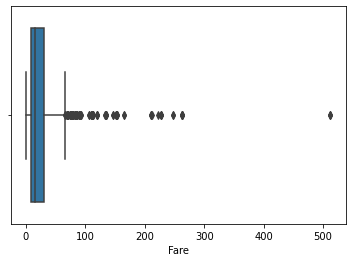

In [11]:
sns.boxplot(titanic.Fare);

Fare değişkeninedeki outlier değerleri Z-Score kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız. 

In [12]:
z_score = (titanic.Fare - titanic.Fare.mean() ) / titanic.Fare.std()
(z_score>3).sum(), (z_score<-3).sum()

(20, 0)

In [13]:
z_df = titanic.copy()
upper_value=z_df[z_score<=3]['Fare'].max()
lower_value=z_df[z_score>=-3]['Fare'].min()
upper_value,lower_value

(164.8667, 0.0)

In [14]:
upper_replace_value = titanic[z_score<=3].Fare.max()
lower_replace_value = titanic[z_score>=-3].Fare.min()

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [15]:
lower_replace_value, upper_replace_value

(0.0, 164.8667)

In [16]:
titanic_replaced = titanic.copy()
titanic_replaced.Fare[z_score>3] = upper_replace_value
titanic_replaced.Fare[z_score<-3] = lower_replace_value

In [17]:
titanic.Fare.max(),titanic.Fare.min()

(512.3292, 0.0)

In [18]:
titanic_replaced.Fare.min(),titanic_replaced.Fare.max()

(0.0, 164.8667)

Fare değişkeninedeki outlier değerleri IQR metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [19]:
q1 = titanic.Fare.quantile(q=0.25)
q3 = titanic.Fare.quantile(q=0.75)
iqr = q3-q1
iqr

23.0896

In [20]:
q1_t=titanic.Fare<q1
q3_t=titanic.Fare>q3
q1_t.sum() , q3_t.sum()

(223, 222)

In [21]:
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
lower_limit, upper_limit

(-26.724, 65.6344)

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [22]:
outlier=titanic.copy()
outlier["Fare"][outlier.Fare<lower_limit]=lower_limit
outlier["Fare"][outlier.Fare>upper_limit]=upper_limit
outlier['Fare'].min(), outlier['Fare'].max()

(0.0, 65.6344)

Fare değişkeninedeki outlier değerleri Hard-Edges metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [23]:
lower=outlier['Fare'].quantile(q=0.01)
upper=outlier['Fare'].quantile(q=0.99)
print("Sınır değerleri:",lower,"&",upper)
x=len(outlier.Fare[(outlier.Fare<lower) | (outlier.Fare>upper)])
print("Outlier değer sayısı:",x)

Sınır değerleri: 0.0 & 65.6344
Outlier değer sayısı: 0


Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [24]:
titanic_hard_edges=titanic.copy()
titanic_hard_edges['Fare'][outlier.Fare<lower]=lower
titanic_hard_edges['Fare'][outlier.Fare>upper]=upper
titanic_hard_edges.Fare.min() , titanic_hard_edges.Fare.max()

(0.0, 512.3292)

Fare değişkeni için yukarıdaki 3 metodu kullanarak sınır değerler olarak bulduğunuz değerleri ve outlier sayılarını karşılaştırın. Bu değişken için hangisini kullanmak daha mantıklı olabilir?

In [25]:
 """

Zscore :20
IQR :222
Hard Edge:9
 
 """

'\n\nZscore :20\nIQR :222\nHard Edge:9\n\n'